In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [2]:
import numpy 
import sklearn
from sklearn import preprocessing
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

2024-03-10 21:20:32.884419: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 21:20:32.884567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 21:20:33.045556: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import pandas as pd
loan_data = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
label_encoder = preprocessing.LabelEncoder()
loan_data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
label_encoder_y = preprocessing.LabelEncoder() 

In [7]:
loan_data[' education'] = label_encoder.fit_transform(loan_data[' education'])
loan_data[' self_employed'] = label_encoder.fit_transform(loan_data[' self_employed'])
loan_data[' loan_status'] = label_encoder_y.fit_transform(loan_data[' loan_status'])
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [8]:
np_loan = loan_data.to_numpy()
X_data = np_loan[:,1:12]
Y_data=np_loan[:,12]

#Scale the data to ease the computation and prevent loss
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
Y_data = tf.keras.utils.to_categorical(Y_data,num_classes = 2)

In [9]:
#Verileri %80-%20 oranında eğitim ve test olarak bölme
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,train_size = 0.8)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3415, 11) (3415, 2) (854, 11) (854, 2)


In [10]:
#Modeli tanımlayarak buraya katman ekleyebilir veya silebilir ve doğruluğu nasıl etkilediğini anlamak için parametreleri değiştirebilirsiniz.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(512,input_shape = (11,),name = "Hidden_layer_1",activation="relu"))
model.add(keras.layers.Dense(512,name = "Hidden_layer_2",activation="relu"))
#model.add(keras.layers.Dense(16,name = "Hidden_layer_3",activation="relu"))
model.add(keras.layers.Dense(128,name = "Hidden_layer_4",activation="relu"))
model.add(keras.layers.Dense(2,name = "Output_layer",activation="softmax"))
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer_1 (Dense)          │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_4 (Dense)          │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,722 (1.28 MB)

 Trainable params: 334,722 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
verbose = 1
batch_size = 8
epochs = 30
validation_split = 0.1

In [12]:
history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=verbose,
          validation_split=validation_split)

Epoch 1/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8860 - loss: 0.2816 - val_accuracy: 0.9327 - val_loss: 0.1450
Epoch 2/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9328 - loss: 0.1957 - val_accuracy: 0.9240 - val_loss: 0.1556
Epoch 3/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9555 - loss: 0.1274 - val_accuracy: 0.9620 - val_loss: 0.1144
Epoch 4/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9521 - loss: 0.1287 - val_accuracy: 0.9474 - val_loss: 0.1485
Epoch 5/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9590 - loss: 0.1240 - val_accuracy: 0.9211 - val_loss: 0.1872
Epoch 6/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9640 - loss: 0.0943 - val_accuracy: 0.9649 - val_loss: 0.1027
Epoch 7/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9633 - loss: 0.0948 - val_accuracy: 0.9532 - val_loss: 0.0919
Epoch 8/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9683 - loss: 0.0853 - val_accuracy: 0.

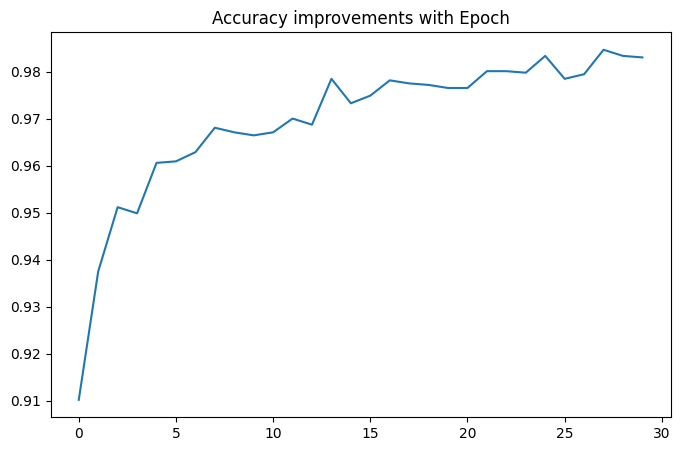


Evaluation against Test Dataset :

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9416 - loss: 0.2679


[0.24381473660469055, 0.9484777450561523]

In [13]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n")
model.evaluate(X_test,Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


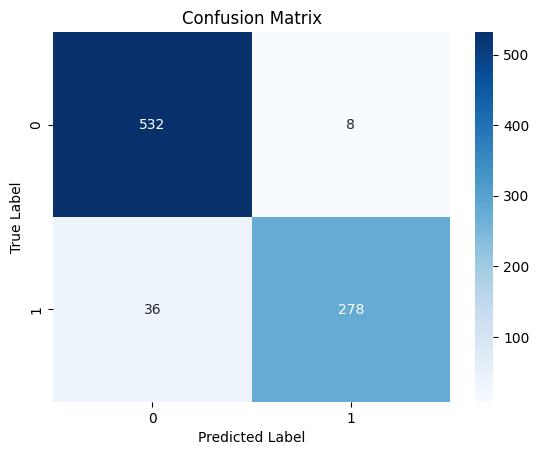

In [14]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Test verileri üzerinde tahmin yapma
Y_pred = model.predict(X_test)
# Tahmin edilen sınıfları geri dönüştürme (one-hot encoding'den geri dönüşüm)
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Gerçek sınıfları geri dönüştürme (one-hot encoding'den geri dönüşüm)
Y_true = np.argmax(Y_test, axis=1)

# Confusion matrix'i hesaplama
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Renkli görselleştirme
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [15]:
from sklearn.metrics import classification_report

# Classification report'u hesaplama
report = classification_report(Y_true, Y_pred_classes)

print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       540
           1       0.97      0.89      0.93       314

    accuracy                           0.95       854
   macro avg       0.95      0.94      0.94       854
weighted avg       0.95      0.95      0.95       854



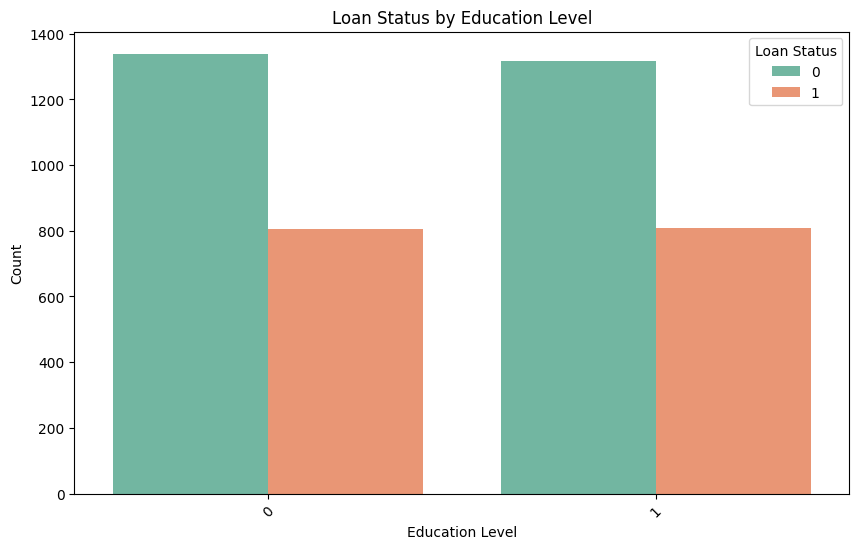

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Renkli count plot oluşturma
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x=' education', hue=' loan_status', palette='Set2')
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()



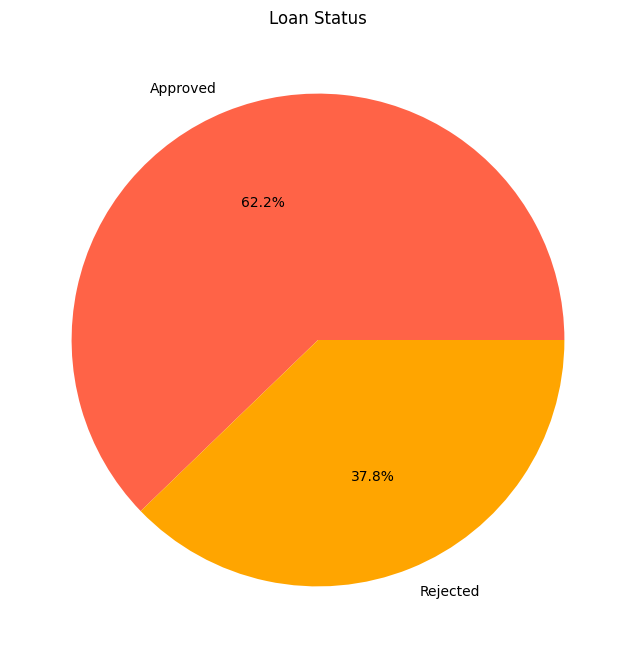

In [17]:
import matplotlib.pyplot as plt

# Onaylanmış ve reddedilmiş kredi başvurularının sayısını hesaplayın
loan_status_counts = loan_data[' loan_status'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=['Approved', 'Rejected'], autopct='%1.1f%%', colors=['tomato', 'orange'])
plt.title('Loan Status')
plt.show()